In [24]:
import numpy as np
import matplotlib.pyplot as plt

import decimal


# decimal.getcontext().prec = 5

In [25]:
def bolts(A2, A3, x, x_o):
    A1 = 303
    a = []
    y = []
    for i in A2:
        for k in x_o:
            for j in A3:
                b = A1 + (i - A1)/(1+np.exp((x-k)/j))
                a.append(b)
                y.append([i , j, k])
    return(np.array(a), np.array(y))

In [26]:
def bolts_int(A2, A3, x, x_o):
    A1 = 303
    b = A1 + (A2-A1)/(1+np.exp((x-x_o)/A3))
    return b

In [27]:
A2 = 700
A3 = .5
x_o = 22

In [28]:
A2 = np.linspace(303, 773,50)
A3 = np.linspace(0.1, 1, 5)
x_o = np.linspace(1, 55, 50)
x = np.linspace(0, 55, 300)

# mol = np.linspace(.1, 0.3, 10)

In [29]:
x_o

array([ 1.        ,  2.10204082,  3.20408163,  4.30612245,  5.40816327,
        6.51020408,  7.6122449 ,  8.71428571,  9.81632653, 10.91836735,
       12.02040816, 13.12244898, 14.2244898 , 15.32653061, 16.42857143,
       17.53061224, 18.63265306, 19.73469388, 20.83673469, 21.93877551,
       23.04081633, 24.14285714, 25.24489796, 26.34693878, 27.44897959,
       28.55102041, 29.65306122, 30.75510204, 31.85714286, 32.95918367,
       34.06122449, 35.16326531, 36.26530612, 37.36734694, 38.46938776,
       39.57142857, 40.67346939, 41.7755102 , 42.87755102, 43.97959184,
       45.08163265, 46.18367347, 47.28571429, 48.3877551 , 49.48979592,
       50.59183673, 51.69387755, 52.79591837, 53.89795918, 55.        ])

In [30]:
a2 = bolts(A2, A3, x, x_o)

In [31]:
e1, e2 = a2

In [32]:
e1 = np.array(e1)

In [33]:
e2 = np.array(e2)

In [34]:
e1

array([[303.        , 303.        , 303.        , ..., 303.        ,
        303.        , 303.        ],
       [303.        , 303.        , 303.        , ..., 303.        ,
        303.        , 303.        ],
       [303.        , 303.        , 303.        , ..., 303.        ,
        303.        , 303.        ],
       ...,
       [773.        , 773.        , 773.        , ..., 613.79031201,
        576.93540516, 538.        ],
       [773.        , 773.        , 773.        , ..., 592.75299017,
        565.75846849, 538.        ],
       [773.        , 773.        , 773.        , ..., 580.74638219,
        559.55297386, 538.        ]])

In [35]:
e2

array([[3.03e+02, 1.00e-01, 1.00e+00],
       [3.03e+02, 3.25e-01, 1.00e+00],
       [3.03e+02, 5.50e-01, 1.00e+00],
       ...,
       [7.73e+02, 5.50e-01, 5.50e+01],
       [7.73e+02, 7.75e-01, 5.50e+01],
       [7.73e+02, 1.00e+00, 5.50e+01]])

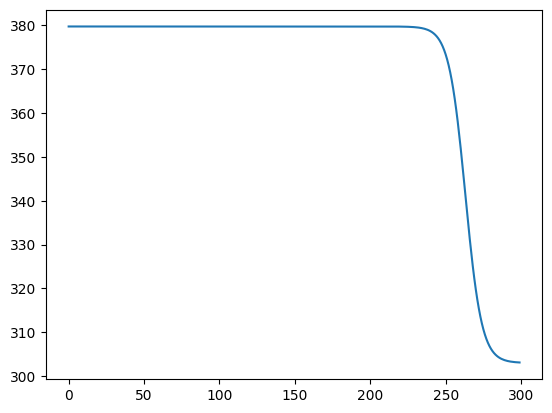

In [36]:
plt.plot(e1[2219])

In [37]:
from scipy import signal

# r1 = []
# for i in e1:
#     downsampled =  signal.resample(i, 1000)
#     r1.append(downsampled)

# r1 = np.array(r1).astype(np.half)

In [38]:
e1.shape

(12500, 300)

In [40]:
np.save('final_profile_300', e1)

In [41]:
np.save('final_param_300', e2)

In [ ]:
test = bolts_int(7.73e+02, 1.00e-01, x, 1.00e+00)

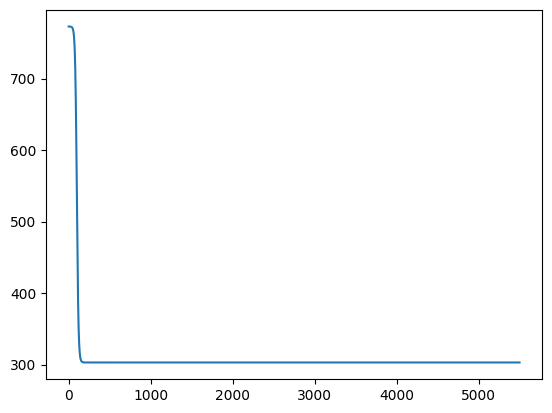

In [ ]:
plt.plot(test)